Diabetes Prediction Using ML models

In [4]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data preprocessing

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data=data.drop_duplicates()

In [11]:
#Checking for the values of 0 in columns
print(data[data["Pregnancies"]==0].shape[0])
print(data[data["Glucose"]==0].shape[0])
print(data[data["BloodPressure"]==0].shape[0])
print(data[data["SkinThickness"]==0].shape[0])
print(data[data["BMI"]==0].shape[0])
print(data[data["Insulin"]==0].shape[0])

111
5
35
227
11
374


Data Visualization

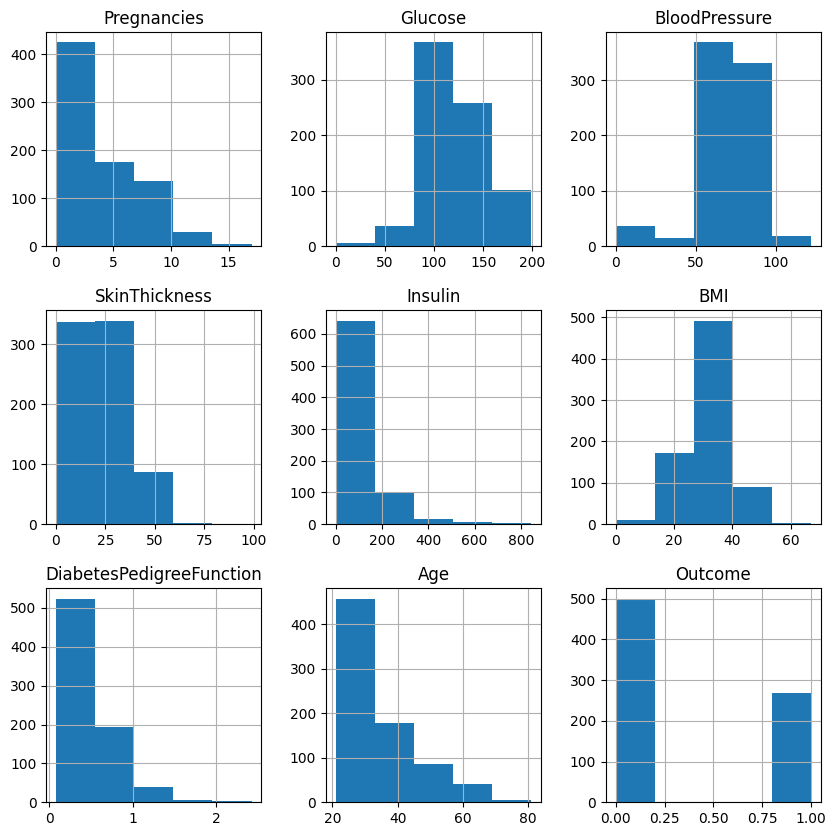

In [12]:
data.hist(bins=5,figsize=(10,10))
plt.show()

From the above histogram we can clearly see that their is an existence of outliers and skewness.

In [13]:
data["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())
data["BloodPressure"]=data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].mean())
data["Insulin"]=data["Insulin"].replace(0,data["Insulin"].median())
data["BMI"]=data["BMI"].replace(0,data["BMI"].median())

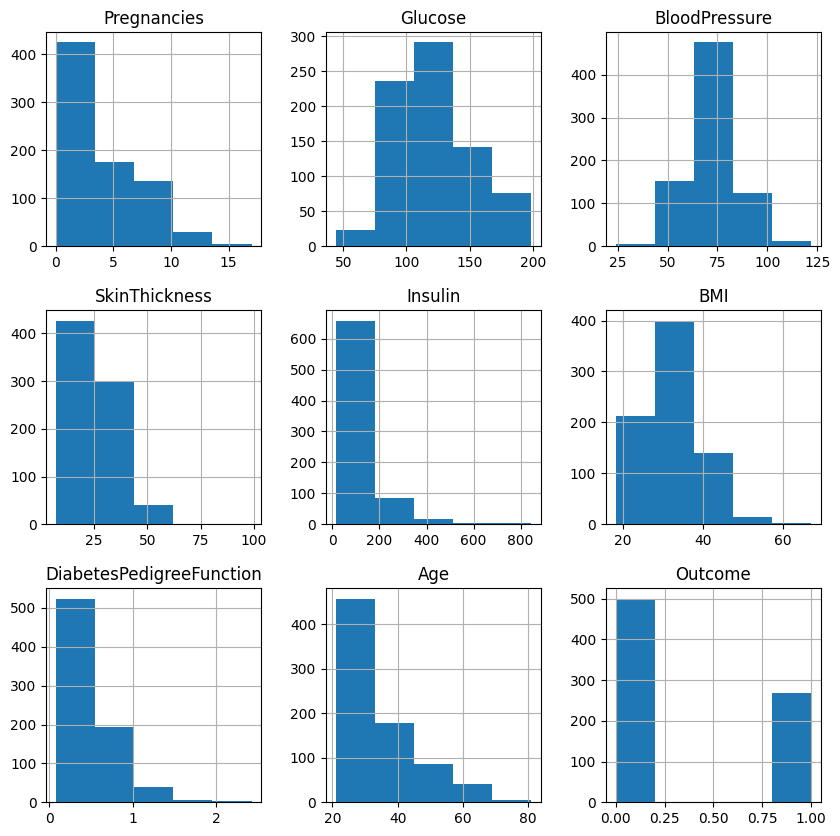

In [14]:
data.hist(bins=5,figsize=(10,10))
plt.show()

In [15]:
df=data

Checking for outliers

<Axes: xlabel='DiabetesPedigreeFunction'>

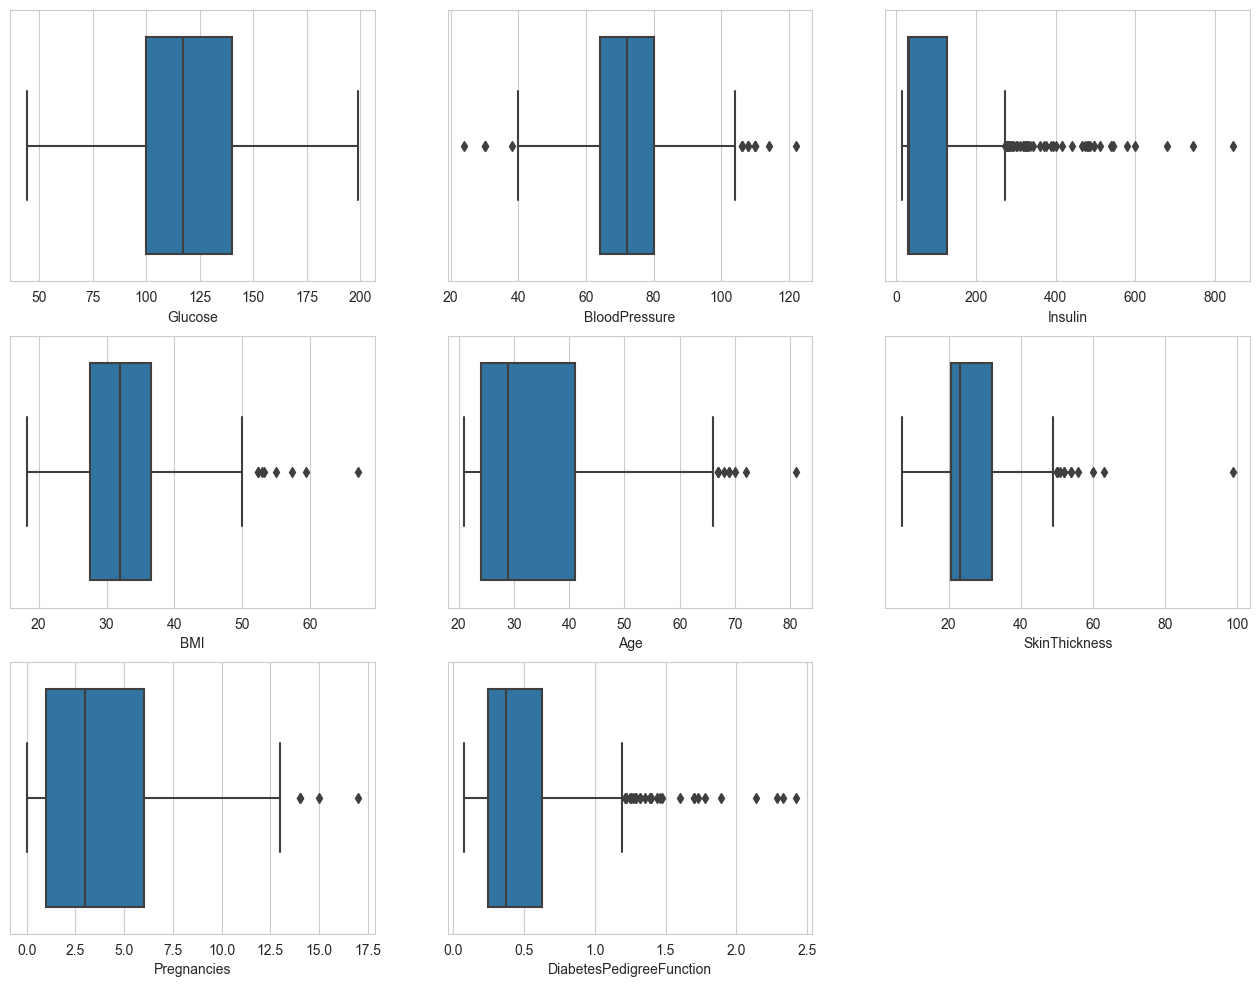

In [16]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)



Feature selection

<Axes: >

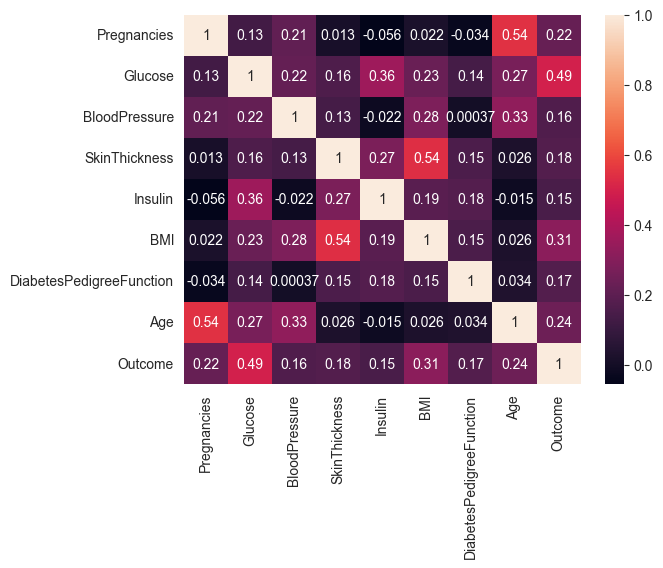

In [17]:
corr=df.corr()
sns.heatmap(corr,annot=True)

Hear only glucose,BMI,age pregnancies are higly correlated eith the target variable so removing the less coreelated variable will not effect the model

In [18]:
df_selected=df.drop(["BloodPressure","Insulin","DiabetesPedigreeFunction"],axis="columns")

Handling outliers
Quantile Transformer :- This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

In [19]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.308996,0.077575,0.585398,1.0
3,0.232725,0.124511,0.505867,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<Axes: xlabel='SkinThickness'>

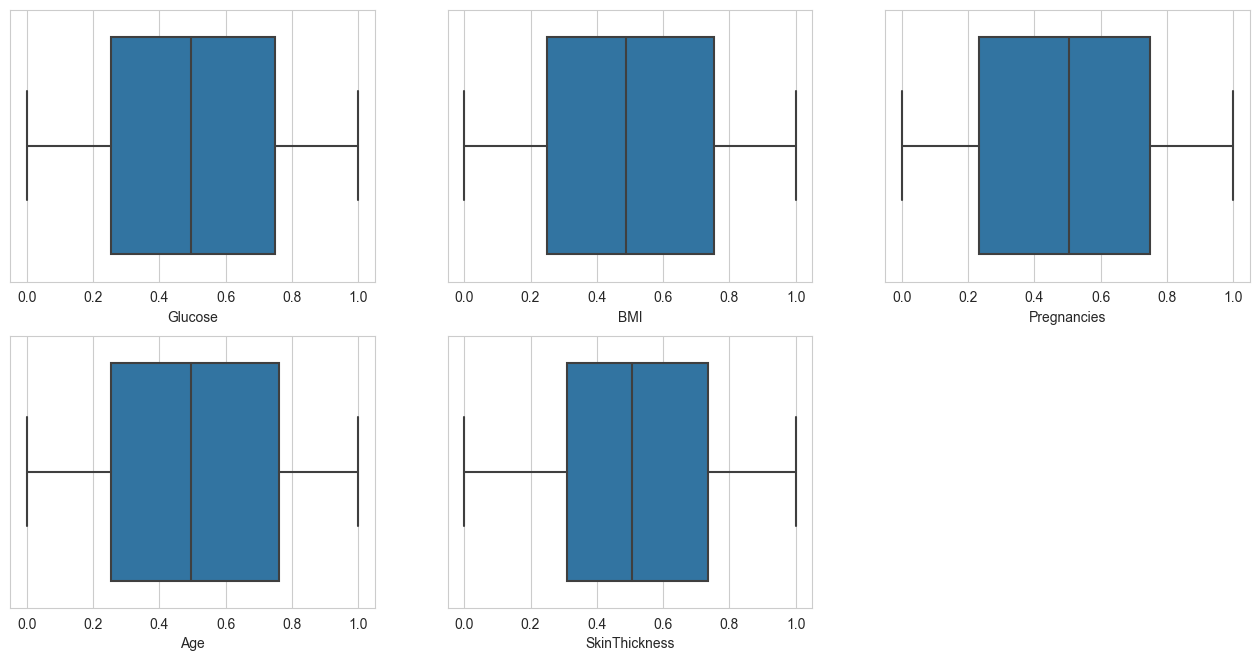

In [20]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

Split data into x nd y tearm

In [21]:
target_name='Outcome'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)

In [23]:
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.308996,0.077575,0.585398
3,0.232725,0.124511,0.505867,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [24]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test
print(X_train.shape),print(y_train.shape)
X_test.shape,y_test.shape

(614, 5)
(614,)


((154, 5), (154,))

Classification Algorithms
KNN
Naive Bayes
SVM
The models include the following:-
a. Hyper Parameter Tuning using GridSearch CV
1. What Is Hyperparameter Tuning?

Hyperparameters are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Random Forest Algorithms, k in KNN Classifier. Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models.

2. What is GridSearch ?

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

3. What Steps To Follow For Hyper Parameter Tuning?

Select the type of model we want to use like RandomForestClassifier, regressor or any other model
Check what are the parameters of the model
Select the methods for searching the hyperparameter
Select the cross-validation approach
Evaluate the model using the score
b. Fit Best Model
9. Classification Algorithms
KNN
Naive Bayes
SVM
Decision Tree
Random Forest
Logistic Regression
The models include the following:-
a. Hyper Parameter Tuning using GridSearch CV
1. What Is Hyperparameter Tuning?

Hyperparameters are the variables that the user specify usually while building the Machine Learning model. thus, hyperparameters are specified before specifying the parameters or we can say that hyperparameters are used to evaluate optimal parameters of the model. the best part about hyperparameters is that their values are decided by the user who is building the model. For example, max_depth in Random Forest Algorithms, k in KNN Classifier. Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models.

2. What is GridSearch ?

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

3. What Steps To Follow For Hyper Parameter Tuning?

Select the type of model we want to use like RandomForestClassifier, regressor or any other model
Check what are the parameters of the model
Select the methods for searching the hyperparameter
Select the cross-validation approach
Evaluate the model using the score
b. Fit Best Model
c. Predict on testing data using that model
d. Performance Metrics :- Confusion Matrix, F1 Score, Precision Score, Recall Score

K-nearest neighbours

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

In [32]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [34]:
best_model = grid_search.fit(X_train,y_train)

In [35]:
#Best Hyperparameters Value
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 17


In [36]:
knn_pred = best_model.predict(X_test)

classification report               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       107
         1.0       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       107
         1.0       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154


 F1:
 0.6744186046511628

 Precision score is:
 0.7435897435897436

 Recall score is:
 0.6170212765957447

 Confusion Matrix:



<Axes: >

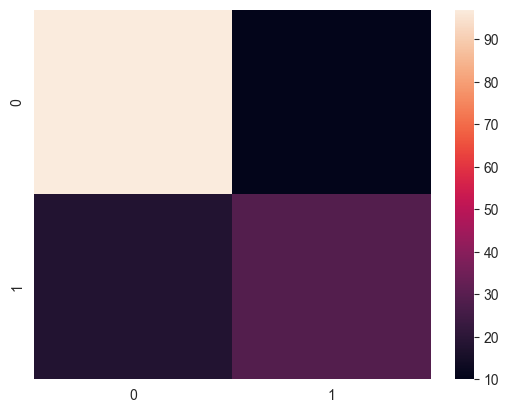

In [37]:
print("classification report",classification_report(y_test,knn_pred))
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

Naive Bayers

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [39]:
best_model=nbModel_grid.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [41]:
nb_pred=best_model.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       107
         1.0       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154


 F1:
 0.5813953488372093

 Precision score is:
 0.6410256410256411

 Recall score is:
 0.5319148936170213

 Confusion Matrix:



<Axes: >

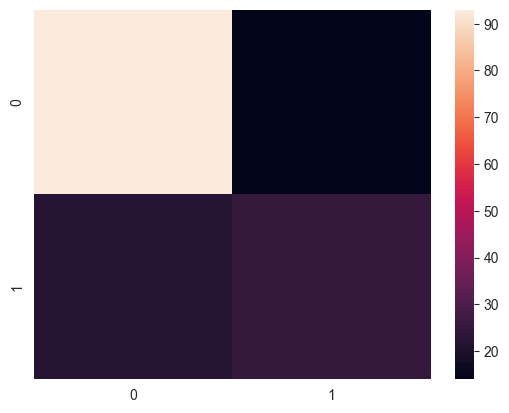

In [43]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

Support vector machine(SVM)

In [44]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [45]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [46]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [47]:
grid_result=grid_search.fit(X,y)

In [48]:
svm_pred=grid_result.predict(X_test)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       107
         1.0       0.73      0.70      0.72        47

    accuracy                           0.83       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154


 F1:
 0.7173913043478262

 Precision score is:
 0.7333333333333333

 Recall score is:
 0.7021276595744681

 Confusion Matrix:



<Axes: >

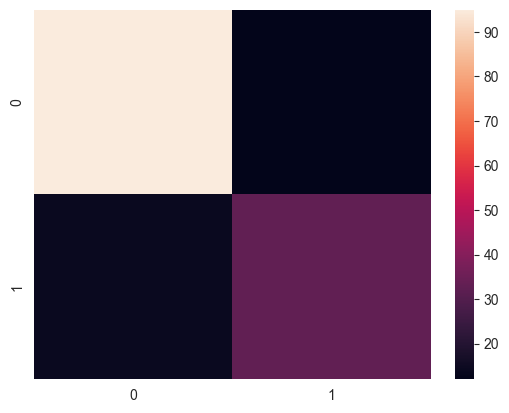

In [49]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,svm_pred))
print("\n Precision score is:\n",precision_score(y_test,svm_pred))
print("\n Recall score is:\n",recall_score(y_test,svm_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

In [62]:
input_data = (5,166,72,19,175)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
input_data_reshaped1=quantile.fit_transform(input_data_reshaped)
std_data = quantile.transform(input_data_reshaped1)
print(std_data)

prediction = best_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[0. 0. 0. 0. 0.]]
[0.]
The person is not diabetic


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (1). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
